# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

query_url = f"{url}appid={api_key}&units={units}&q="

In [32]:
temperatures = []
locationas = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxTemp = []
windSpeed = []
data = [locationas, cloudiness, country, date, humidity, lat, lng, maxTemp, windSpeed]
for i in range(len(cities)):
    time.sleep(.2)
    try:
        response = requests.get(query_url+cities[i]).json()
        print("Processing Recored " + str(i) + " | " + cities[i] + " " + str(response['main']['temp']))
        temperatures.append(response['main']['temp'])
        locationas.append(cities[i])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        windSpeed.append(response['wind']['speed'])
    
    except KeyError:
        print("Weather data? It's stil 1840s in " + cities[i])
        
df = pd.DataFrame()
columns = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']
for i in range(len(columns)):
    df[columns[i]] = data[i]

Processing Recored 0 | puerto ayora 84.2
Weather data? It's stil 1840s in vaitupu
Processing Recored 2 | belmonte 37.03
Processing Recored 3 | mataura 58.36
Processing Recored 4 | kaitangata 56.38
Weather data? It's stil 1840s in lolua
Processing Recored 6 | bouna 69.07
Processing Recored 7 | kapaa 78.96
Processing Recored 8 | mehamn 39.2
Processing Recored 9 | tuatapere 54.89
Processing Recored 10 | jamestown 79.64
Processing Recored 11 | port elizabeth 48.18
Processing Recored 12 | jacareacanga 74.38
Processing Recored 13 | hobart 71.6
Processing Recored 14 | saskylakh -7.44
Processing Recored 15 | port lincoln 77.62
Processing Recored 16 | faya 62.6
Processing Recored 17 | thompson -13.01
Weather data? It's stil 1840s in mrirt
Processing Recored 19 | vaini 63.67
Processing Recored 20 | butaritari 83.51
Processing Recored 21 | hithadhoo 82.61
Processing Recored 22 | shilong 55.62
Processing Recored 23 | bredasdorp 60.8
Processing Recored 24 | alta floresta 76.54
Processing Recored 25

Processing Recored 205 | digby 33.83
Processing Recored 206 | flinders 69.8
Processing Recored 207 | imbituba 73.4
Processing Recored 208 | ust-charyshskaya pristan 13.76
Processing Recored 209 | namibe 75.14
Processing Recored 210 | san policarpo 76.4
Processing Recored 211 | kayes 62.23
Processing Recored 212 | atuona 80.32
Weather data? It's stil 1840s in rawah
Processing Recored 214 | adre 74.02
Processing Recored 215 | saint george 35.6
Processing Recored 216 | la ronge -4.01
Processing Recored 217 | eravur 77.89
Processing Recored 218 | lubliniec 32
Weather data? It's stil 1840s in uralskiy
Weather data? It's stil 1840s in burica
Processing Recored 221 | vrangel 32.44
Processing Recored 222 | hutchinson 34.07
Processing Recored 223 | eirunepe 78.61
Processing Recored 224 | avarua 80.6
Processing Recored 225 | novoagansk 14.08
Processing Recored 226 | torbay 14
Processing Recored 227 | luwuk 74.47
Processing Recored 228 | saint-philippe 36.82
Processing Recored 229 | samarai 83.56

Processing Recored 412 | homer 39.2
Processing Recored 413 | leo 71
Weather data? It's stil 1840s in odweyne
Processing Recored 415 | jelenia gora 25.96
Processing Recored 416 | kilindoni 83.11
Processing Recored 417 | grand gaube 80.6
Processing Recored 418 | hare bay 8.6
Processing Recored 419 | amzya 14.26
Processing Recored 420 | perth 39.2
Processing Recored 421 | nhulunbuy 87.8
Processing Recored 422 | gualaceo 66.2
Processing Recored 423 | port blair 81.04
Processing Recored 424 | hof 26.6
Processing Recored 425 | san patricio 74.78
Processing Recored 426 | lompoc 59.36
Weather data? It's stil 1840s in toftir
Processing Recored 428 | show low 35.11
Processing Recored 429 | yura 59
Processing Recored 430 | kommunar 35.6
Processing Recored 431 | yulara 84.2
Processing Recored 432 | banjar 73.84
Processing Recored 433 | cubara 70.87
Processing Recored 434 | waddan 43.46
Processing Recored 435 | basco 24.12
Processing Recored 436 | dunedin 53.86
Processing Recored 437 | sambava 78.9

Processing Recored 619 | lang son 54.08
Processing Recored 620 | berlevag 38.19
Weather data? It's stil 1840s in sataua
Processing Recored 622 | hami 16.24
Processing Recored 623 | skibbereen 46.4
Weather data? It's stil 1840s in turtkul
Processing Recored 625 | deniliquin 76.76


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
df.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [34]:
df.to_csv(index=True, path_or_buf=output_data_file)

In [35]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,75,EC,1551049200,74,-0.74,-90.35,84.20,10.29
1,belmonte,0,PT,1551052961,80,40.36,-7.35,37.03,2.39
2,mataura,0,NZ,1551052006,57,-46.19,168.86,58.36,7.20
3,kaitangata,0,NZ,1551052962,67,-46.28,169.85,56.38,10.45
4,bouna,0,CI,1551052962,43,9.27,-3.00,69.07,3.62


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

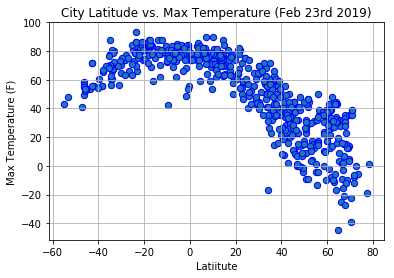

In [36]:
# Temperature is clearly higher around the equator and 
# in the south hemisphere at the moment and colder in the north
# due to planetary tilt

df.plot(kind='scatter', 
        x='Lat', 
        y='Max Temp', 
        title='City Latitude vs. Max Temperature (Feb 23rd 2019)', 
        edgecolor='b',
        s=40)
plt.grid()
plt.xlabel("Latiitute")
plt.ylabel("Max Temperature (F)")

plt.savefig("output_data/Latitute - Max Temperature")

#### Latitude vs. Humidity Plot

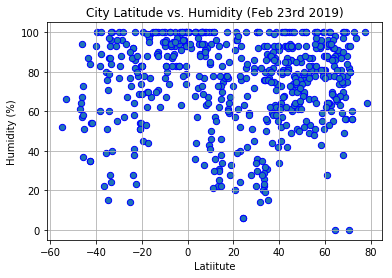

In [37]:


df.plot(kind='scatter', 
        x='Lat', 
        y='Humidity', 
        title='City Latitude vs. Humidity (Feb 23rd 2019)', 
        edgecolor='b',
        s=40)
plt.grid()
plt.xlabel("Latiitute")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/Latitute - Humidity")

Latitude vs. Cloudiness Plot

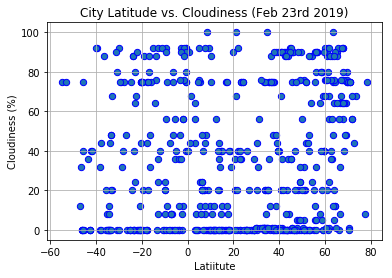

In [38]:
# Cloudiness has no correlation with the lattitude
df.plot(kind='scatter', 
        x='Lat', 
        y='Cloudiness', 
        title='City Latitude vs. Cloudiness (Feb 23rd 2019)', 
        edgecolor='b',
        s=40)
plt.grid()
plt.xlabel("Latiitute")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/Latitute - Cloudiness")

#### Latitude vs. Wind Speed Plot

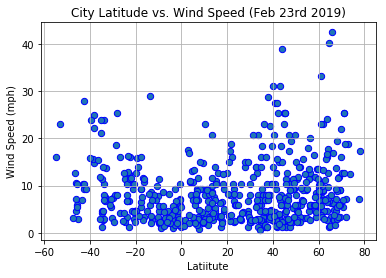

In [39]:
df.plot(kind='scatter', 
        x='Lat', 
        y='Wind Speed', 
        title='City Latitude vs. Wind Speed (Feb 23rd 2019)', 
        edgecolor='b',
        s=40)
plt.grid()
plt.xlabel("Latiitute")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/Latitute - Wind Speed")